In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

In [3]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age,per_LTV,per_LTV_cate
0,199000.0,199000.00,60,F,STREET VENDOR,20000.0,PU,NISSAN,FRONTIER NAVARA,2012,AD,283500,S1,2022-11-14,S1,PL,44,11,70.194004,65-75%
1,60000.0,58822.04,36,M,อื่นๆ,14000.0,CAR,TOYOTA,COROLLA ALTIS,2002,AJ,111000,S1,2022-09-06,S1,PL,53,21,54.054054,50-65%
2,36000.0,35904.37,24,F,พนักงานบริษัท,15000.0,MC,HONDA,CLICK 150I,2019,BH,48500,S1,2022-12-30,S2,PL,32,4,74.226804,65-75%
3,30000.0,28813.69,24,F,เกษตรกร,35000.0,MC,HONDA,PCX 150,2020,ED,76500,S1,2022-11-12,S1,PL,37,3,39.215686,30-50%
4,200000.0,200000.00,36,M,พนักงานบริษัท,40000.0,PU,ISUZU,D-MAX,2013,BU,414500,S1,2022-12-29,S1,PL,57,10,48.250905,30-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,14000.0,14000.00,12,F,STREET VENDOR,15000.0,MC,YAMAHA,FINO (MLEKE),2009,AH,23000,S3,2022-12-24,S2,NPL,67,14,60.869565,65-75%
4025,45000.0,45000.00,18,F,พนักงานบริษัท,40000.0,MC,HONDA,PCX 150,2017,CQ,61500,S3,2022-12-27,S2,NPL,35,6,73.170732,65-75%
4027,144000.0,144000.00,60,M,ข้าราชการ,36000.0,CAR,TOYOTA,VIOS,2010,DX,222000,S3,2022-12-29,S2,NPL,54,13,64.864865,65-75%
4029,39000.0,39000.00,36,F,พนักงานบริษัท,15000.0,MC,HONDA,DREAM 110I,2017,CO,53000,S3,2022-12-29,S2,NPL,35,6,73.584906,65-75%


In [4]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [5]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [6]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model','System CAR Code (Daily)','Final CAR Code Previous Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal Approve Amount       3410 non-null   float64
 1   Principal Amount               3410 non-null   float64
 2   Repayment Tenor Month Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation Description         3410 non-null   int32  
 5   Total Income Amount (Month)    3410 non-null   float64
 6   Collateral Type Code           3410 non-null   int32  
 7   Vehicle Brand                  3410 non-null   int32  
 8   Vehicle Model                  3410 non-null   int32  
 9   Vehicle Release Year           3410 non-null   int64  
 10  Vehicle Sub Model              3410 non-null   object 
 11  Evaluation Amount              3410 non-null   int64  
 12  System CAR Code (Daily)        3410 non-null   i

In [8]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age,per_LTV
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,3.61,19168.37,1.03,10.15,121.26,2012.75,120642.87,0.29,0.1,41.23,10.25,66.04
std,79271.47,79109.90,16.23,0.50,2.61,7843.54,0.66,7.03,64.95,5.32,122898.83,0.51,0.3,10.71,5.32,23.76
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00,3.02
25%,22525.00,21643.71,24.00,0.00,1.00,13500.00,1.00,5.00,55.00,2009.00,35000.00,0.00,0.0,33.00,6.00,62.86
50%,30000.00,29975.93,36.00,0.00,3.00,18000.00,1.00,5.00,132.50,2013.00,44000.00,0.00,0.0,40.00,10.00,71.43
75%,125750.00,124864.20,60.00,1.00,6.00,24805.00,1.00,20.00,190.00,2017.00,209375.00,1.00,0.0,49.00,14.00,74.88
max,314000.00,314000.00,60.00,1.00,8.00,41308.00,4.00,22.00,208.00,2022.00,831000.00,2.00,2.0,72.00,33.00,657.14


In [9]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age,per_LTV
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,3.61,19168.37,1.03,10.15,121.26,2012.75,120642.87,0.29,0.1,41.23,10.25,66.04
std,79271.47,79109.90,16.23,0.50,2.61,7843.54,0.66,7.03,64.95,5.32,122898.83,0.51,0.3,10.71,5.32,23.76
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00,3.02
25%,22525.00,21643.71,24.00,0.00,1.00,13500.00,1.00,5.00,55.00,2009.00,35000.00,0.00,0.0,33.00,6.00,62.86
50%,30000.00,29975.93,36.00,0.00,3.00,18000.00,1.00,5.00,132.50,2013.00,44000.00,0.00,0.0,40.00,10.00,71.43
75%,125750.00,124864.20,60.00,1.00,6.00,24805.00,1.00,20.00,190.00,2017.00,209375.00,1.00,0.0,49.00,14.00,74.88
max,314000.00,314000.00,60.00,1.00,8.00,41308.00,4.00,22.00,208.00,2022.00,831000.00,2.00,2.0,72.00,33.00,657.14


In [10]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [11]:
df.head(5)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age,per_LTV,per_LTV_cate
0,199000.0,199000.00,60,0,0,20000.0,2,14,78,2012,AD,283500,0,2022-11-14,0,PL,44,11,70.194004,65-75%
1,60000.0,58822.04,36,1,6,14000.0,0,20,39,2002,AJ,111000,0,2022-09-06,0,PL,53,21,54.054054,50-65%
2,36000.0,35904.37,24,0,3,15000.0,1,5,34,2019,BH,48500,0,2022-12-30,1,PL,32,4,74.226804,65-75%
3,30000.0,28813.69,24,0,7,35000.0,1,5,133,2020,ED,76500,0,2022-11-12,0,PL,37,3,39.215686,30-50%
4,200000.0,200000.00,36,1,3,40000.0,2,7,49,2013,BU,414500,0,2022-12-29,0,PL,57,10,48.250905,30-50%


In [12]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age,per_LTV
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,3.61,19168.37,1.03,10.15,121.26,2012.75,120642.87,0.29,0.1,41.23,10.25,66.04
std,79271.47,79109.90,16.23,0.50,2.61,7843.54,0.66,7.03,64.95,5.32,122898.83,0.51,0.3,10.71,5.32,23.76
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00,3.02
25%,22525.00,21643.71,24.00,0.00,1.00,13500.00,1.00,5.00,55.00,2009.00,35000.00,0.00,0.0,33.00,6.00,62.86
50%,30000.00,29975.93,36.00,0.00,3.00,18000.00,1.00,5.00,132.50,2013.00,44000.00,0.00,0.0,40.00,10.00,71.43
75%,125750.00,124864.20,60.00,1.00,6.00,24805.00,1.00,20.00,190.00,2017.00,209375.00,1.00,0.0,49.00,14.00,74.88
max,314000.00,314000.00,60.00,1.00,8.00,41308.00,4.00,22.00,208.00,2022.00,831000.00,2.00,2.0,72.00,33.00,657.14


In [13]:
# sns.pairplot(df, hue="DPD")

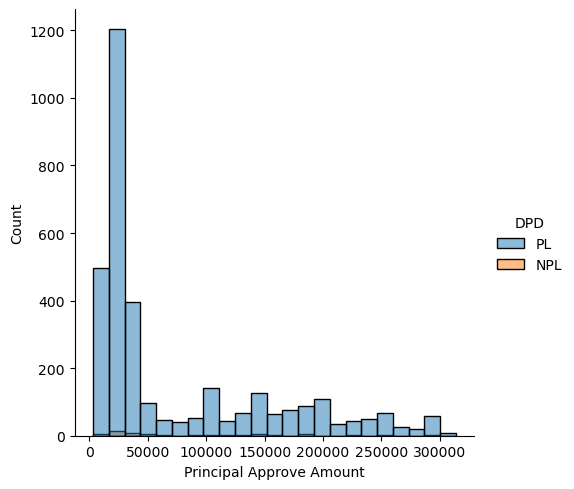

In [14]:
sns.displot(data=df, x="Principal Approve Amount", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Approve Amount', ylabel='Density'>

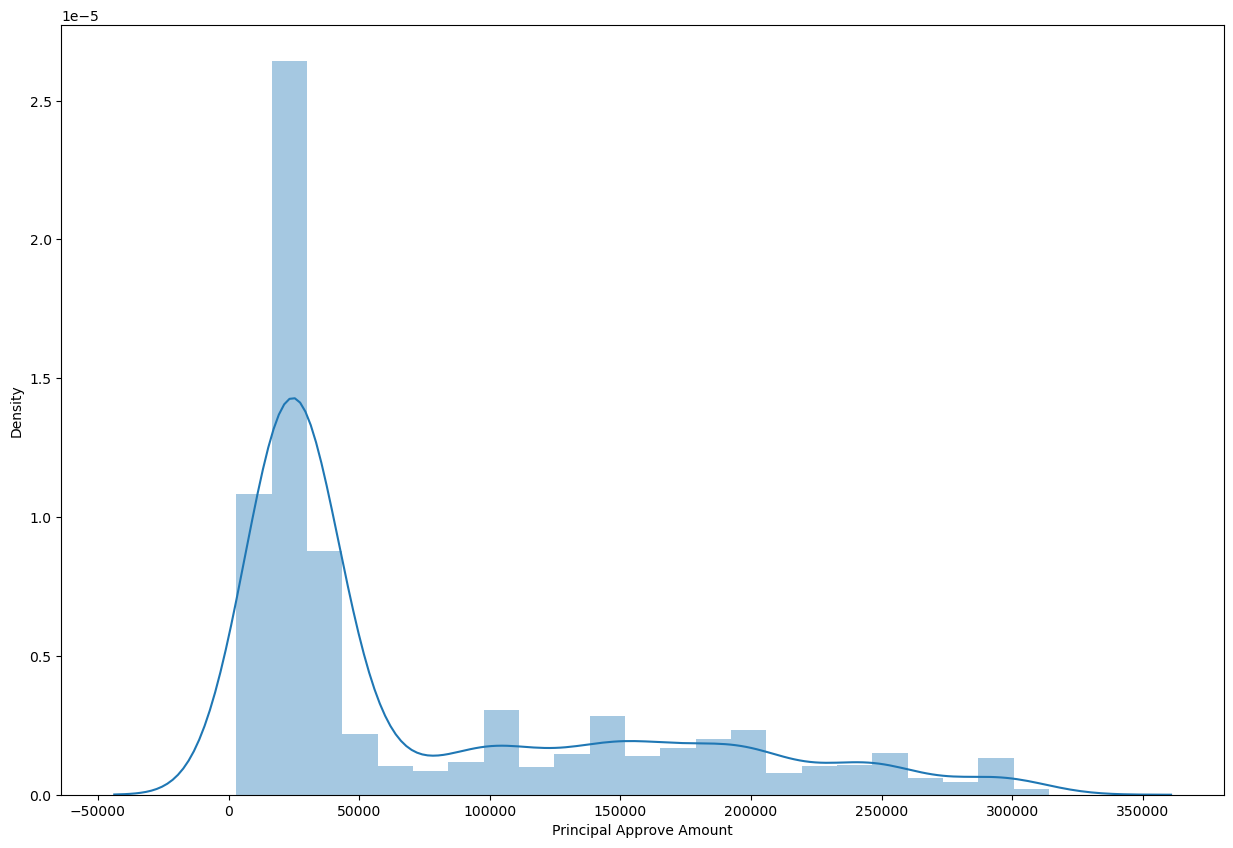

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Approve Amount'])

In [16]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [17]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [18]:
cols = df[['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age']]

In [19]:
cols = df[['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age']]
X = cols
y = df['DPD']

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=101)

In [22]:
X_train.shape

(1875, 12)

In [23]:
X_test.shape

(1535, 12)

In [24]:
y_train.shape

(1875,)

In [25]:
y_test.shape

(1535,)

In [26]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [27]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [28]:
y_train.value_counts()

PL     1845
NPL      30
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

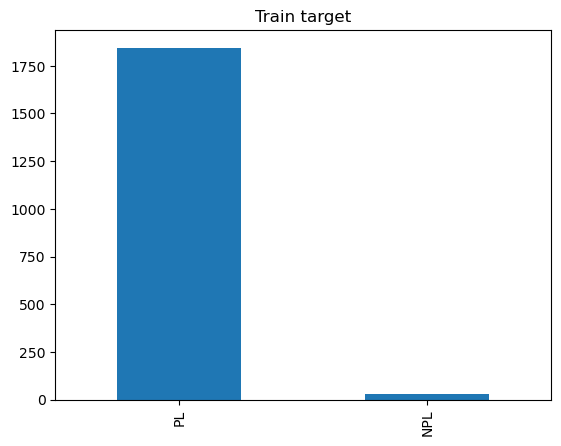

In [29]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

## Feature Importance Decisiontree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [32]:
model.feature_importances_

array([0.12344735, 0.05953765, 0.03422457, 0.04676572, 0.12564491,
       0.        , 0.00856278, 0.15729941, 0.05400192, 0.15744284,
       0.13463622, 0.09843663])

In [33]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Evaluation Amount               0.157443
Vehicle Model                   0.157299
age                             0.134636
Total Income Amount (Month)     0.125645
Principal Approve Amount        0.123447
Vehicle Age                     0.098437
Repayment Tenor Month Number    0.059538
Vehicle Release Year            0.054002
Occupation Description          0.046766
Gender                          0.034225
Vehicle Brand                   0.008563
Collateral Type Code            0.000000
dtype: float64

In [34]:
fs.sum()

0.9999999999999999

<AxesSubplot:>

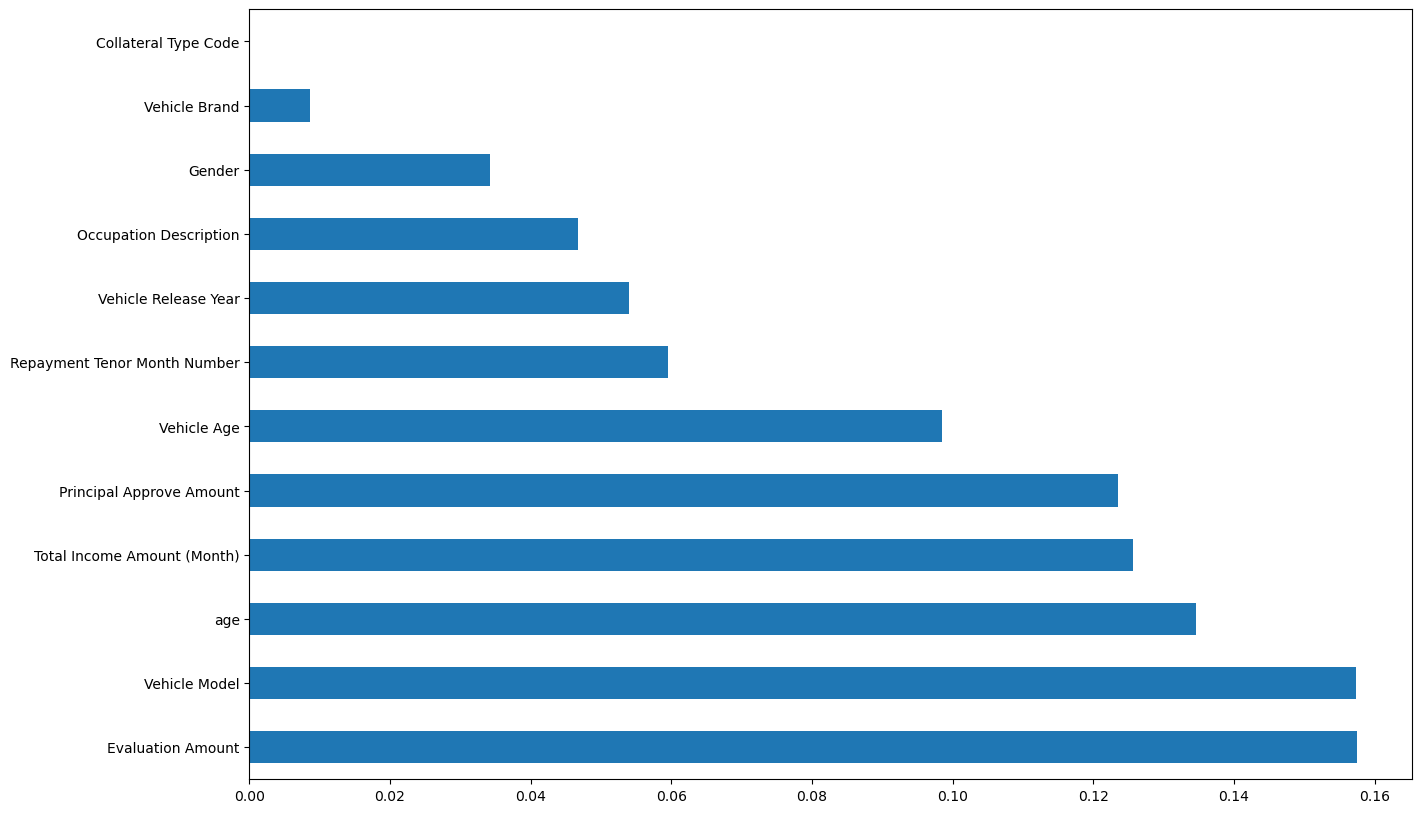

In [35]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

# Cross Validation

In [36]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [37]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model.fit(X_train, y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation mean is :", np.mean(score)*100)
    print("Cross Validation std is :", np.std(score)*100)
    return model

In [38]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [39]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
cv_lr = classify(model,X,y)

Accuracy is :  99.31573802541544
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is : 98.38709677419354
Cross Validation std is : 0.14662756598240456


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
cv_dt = classify(model,X,y)

Accuracy is :  97.5562072336266
[0.95601173 0.96774194 0.96774194 0.96187683 0.95894428 0.96187683
 0.95307918 0.97067449 0.95894428 0.96480938]
Cross Validation mean is : 96.21700879765396
Cross Validation std is : 0.5319166318831976


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250, random_state=101)
cv_rdf = classify(model,X,y)

Accuracy is :  99.21798631476051
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is : 98.38709677419354
Cross Validation std is : 0.14662756598240456


In [43]:
# sum(cv_dt.predict(X) == y)

In [44]:
# pd.crosstab(y, cv_dt.predict(X))

In [45]:
# 424/(424+54)

In [46]:
# 424/(424+68)

In [47]:
# len(y)

## DecisionTree

In [83]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [84]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 96.35179153094462
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is : 96.18768328445746
Cross Validation std is : 0.32124490176256043


In [56]:
# for k in range (5,15):
#     model = DecisionTreeClassifier(criterion='entropy')
#     score = cross_val_score(model, X, y, cv=10)
#     print(f"Cross Validation {k:02}: accuracy is ", np.mean(score)*100)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=101)

In [58]:
classifier = model.fit(X_train, y_train)
classifier.score(X_test, y_test)*100

96.35179153094462

In [192]:
# print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

In [193]:
y_pred = classifier.predict(X_test)
y_pred

array(['PL', 'PL', 'PL', ..., 'PL', 'PL', 'PL'], dtype=object)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report : \n',cr)

Confusion matrix : 
 [[   0   25]
 [  31 1479]]
Classification report : 
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        25
          PL       0.98      0.98      0.98      1510

    accuracy                           0.96      1535
   macro avg       0.49      0.49      0.49      1535
weighted avg       0.97      0.96      0.97      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


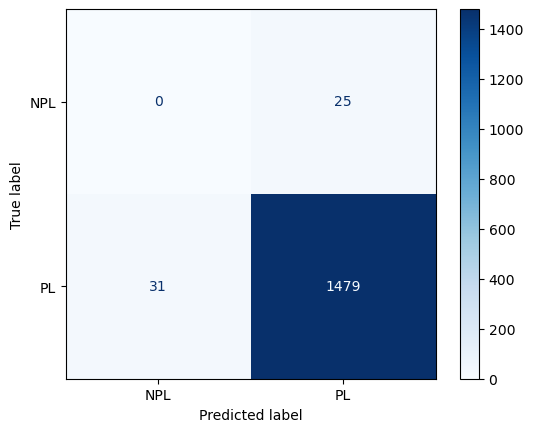

In [60]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


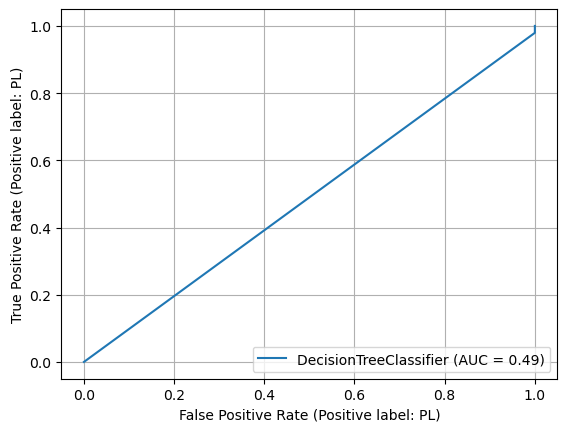

In [61]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [62]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy : 98.1758957654723
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is : 96.18768328445746
Cross Validation std is : 0.32124490176256043


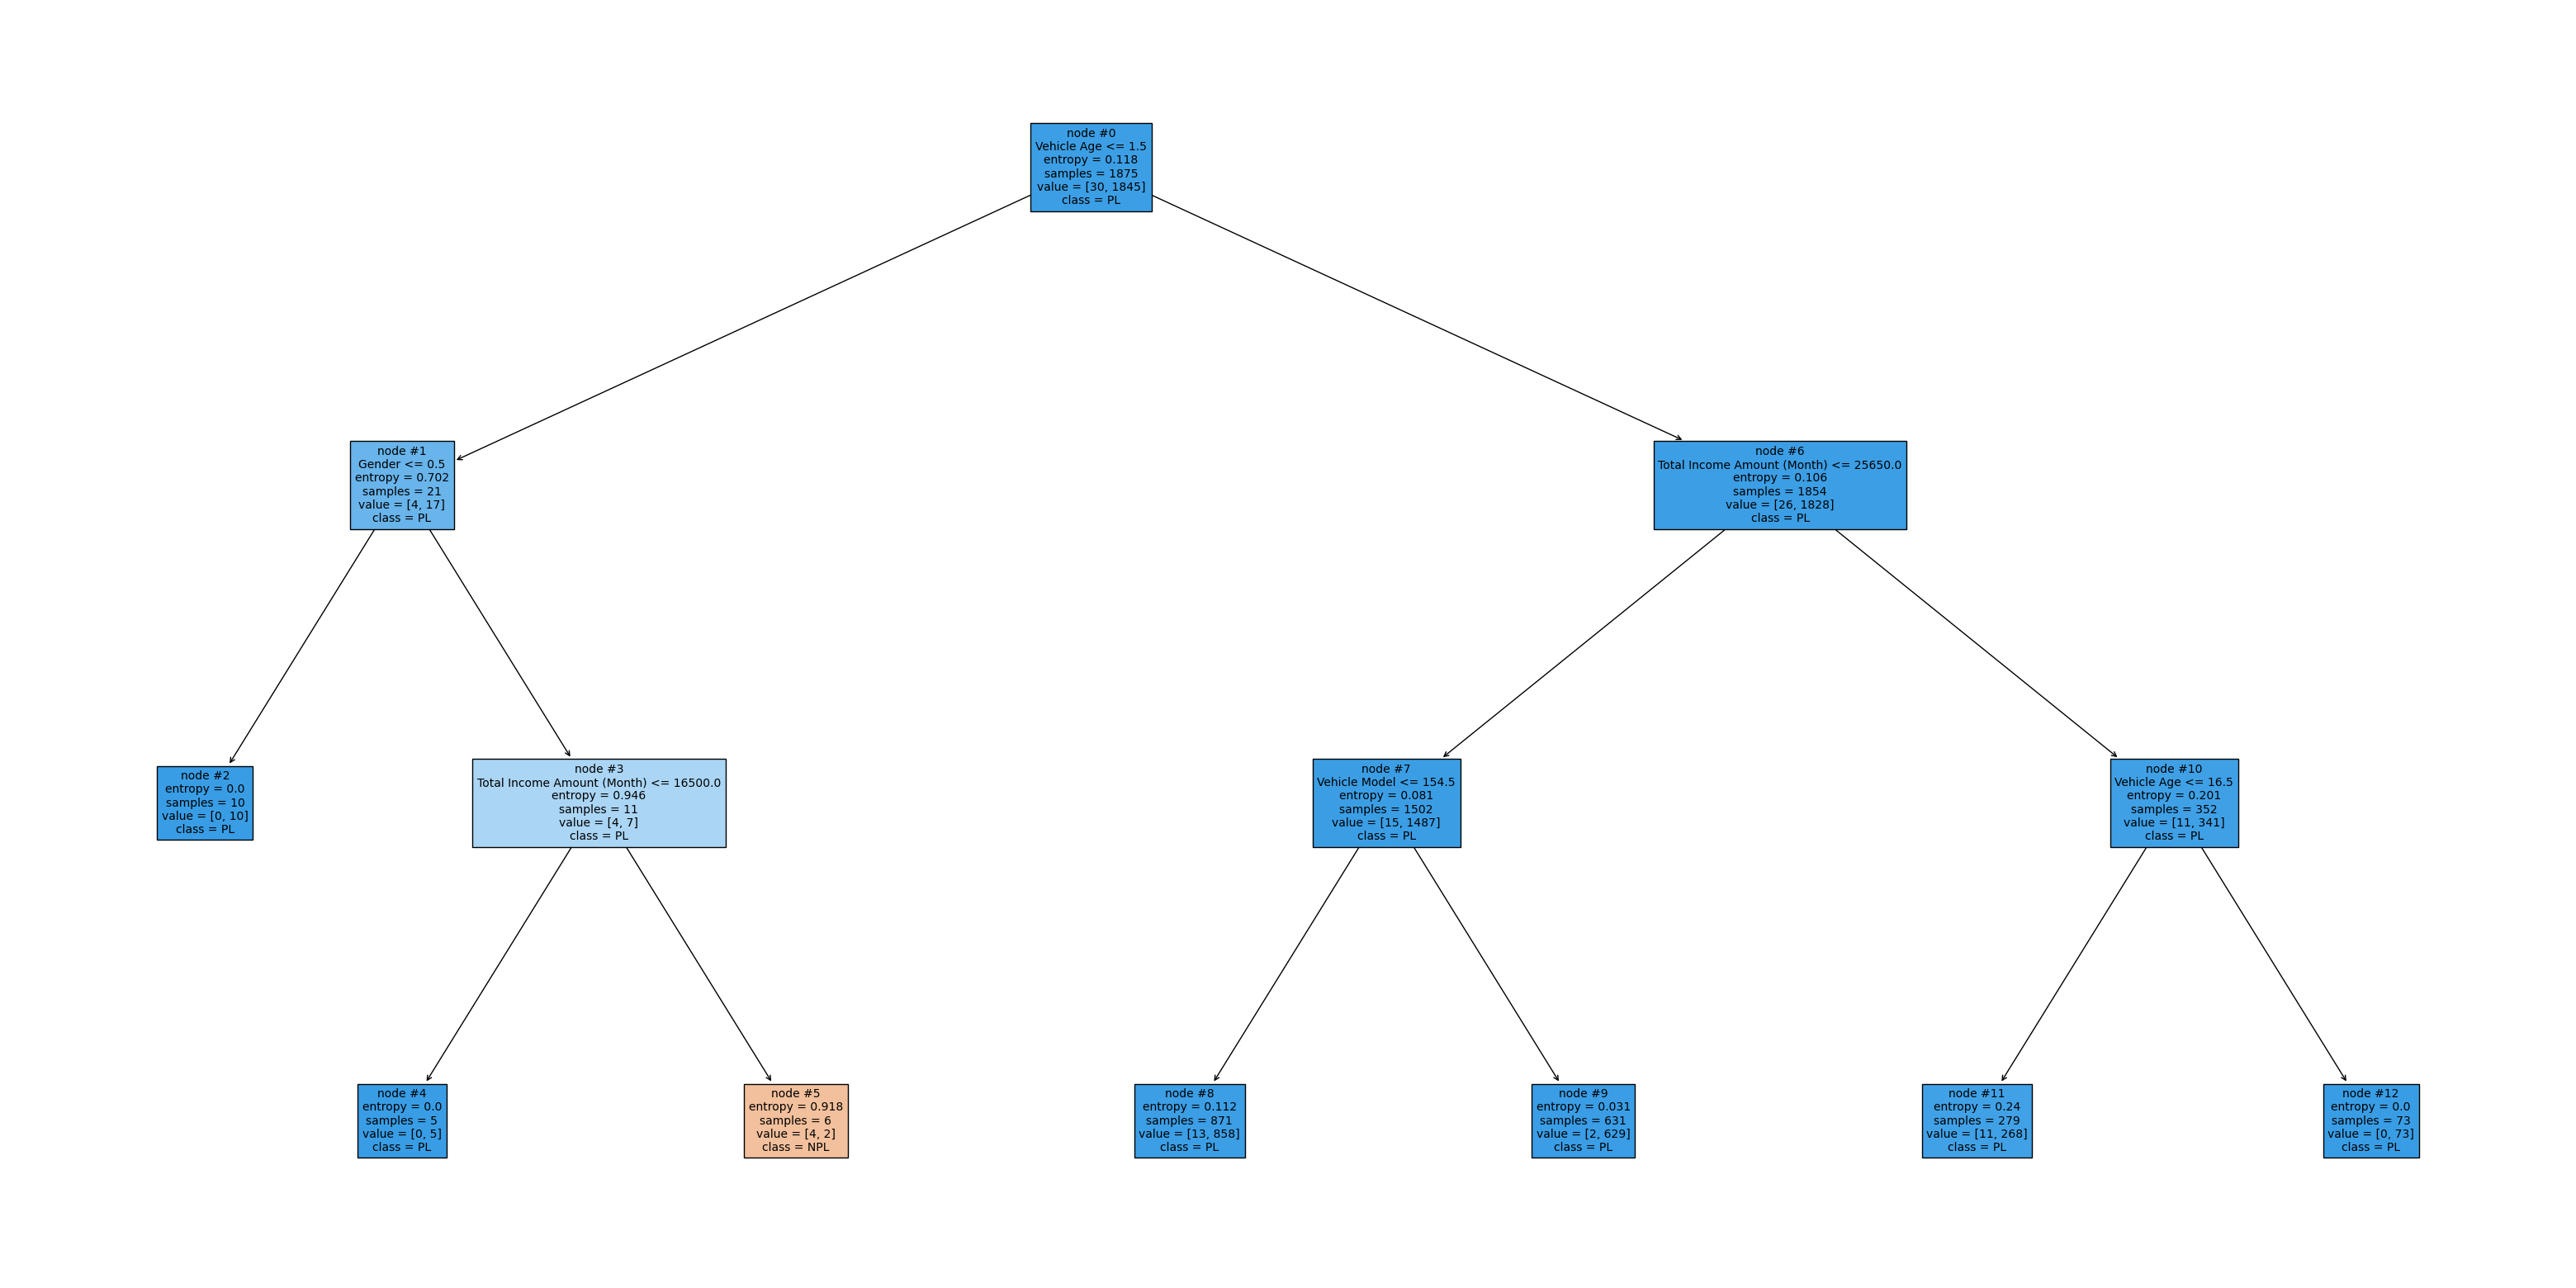

In [63]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [64]:
import graphviz

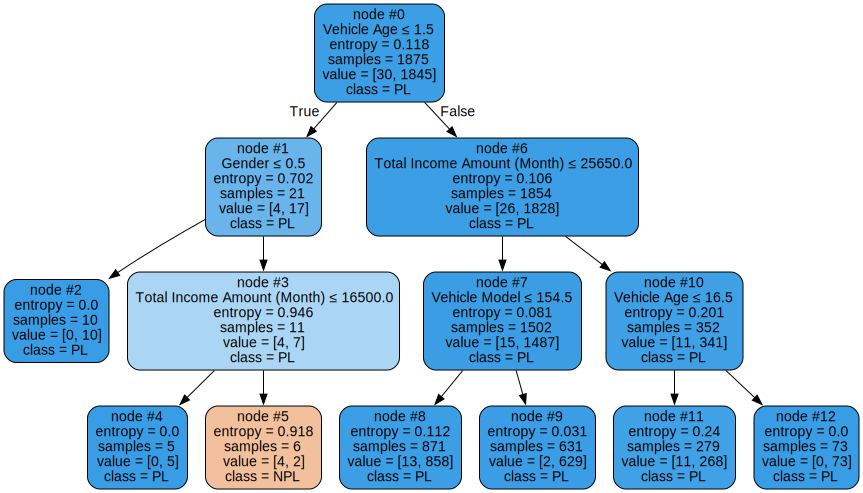

In [65]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   0   25]
 [   3 1507]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        25
          PL       0.98      1.00      0.99      1510

    accuracy                           0.98      1535
   macro avg       0.49      0.50      0.50      1535
weighted avg       0.97      0.98      0.97      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


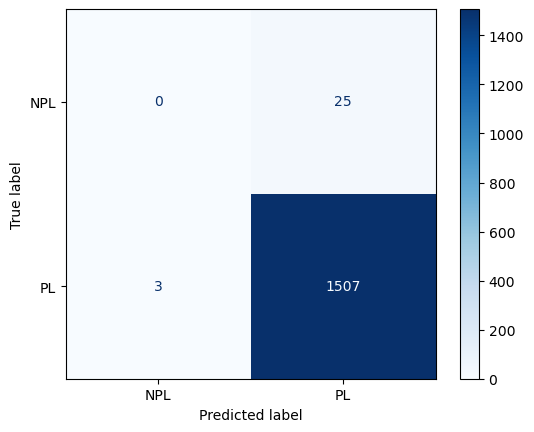

In [67]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


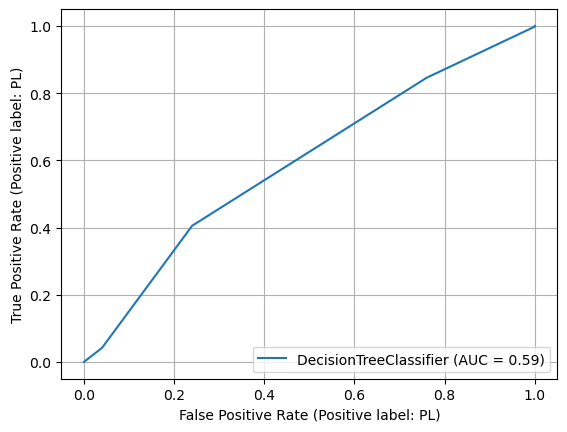

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(X_train,y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [70]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 98.37133550488599
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is : 98.38709677419354
Cross Validation std is : 0.14662756598240456


In [71]:
# for k in range (5,15):
#     model = DecisionTreeClassifier(criterion='entropy')
#     score = cross_val_score(model, X, y, cv=10)
#     print(f"Cross Validation {k:02}: accuracy is ", np.mean(score)*100)

In [77]:
classifier.score(X_test, y_test)*100

98.37133550488599

In [78]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 98.37133550488599


In [79]:
y_pred = classifier.predict(X_test)
y_pred

array(['PL', 'PL', 'PL', ..., 'PL', 'PL', 'PL'], dtype=object)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report : \n',cr)

Confusion matrix : 
 [[   0   25]
 [   0 1510]]
Classification report : 
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        25
          PL       0.98      1.00      0.99      1510

    accuracy                           0.98      1535
   macro avg       0.49      0.50      0.50      1535
weighted avg       0.97      0.98      0.98      1535



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


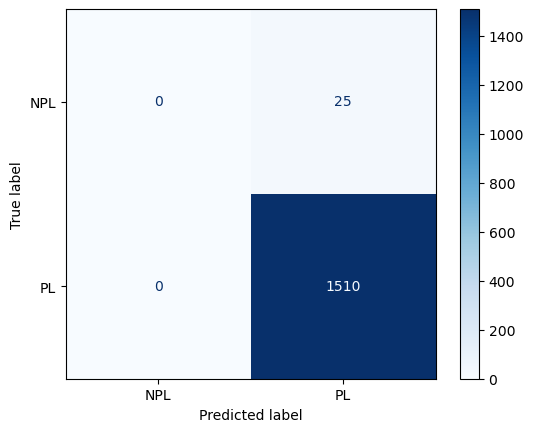

In [81]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


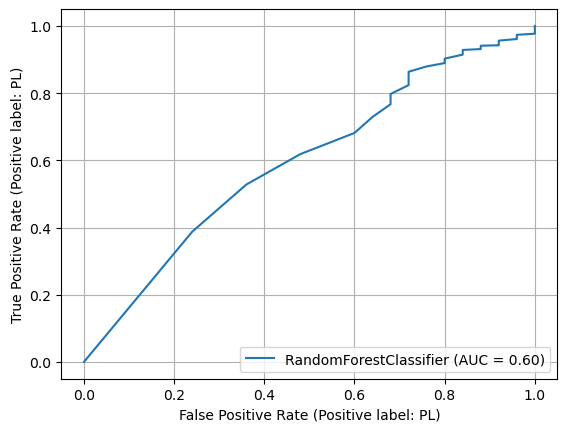

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## ExtraTreesClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = ExtraTreesClassifier()
classifier = model.fit(X_train,y_train)
classifier

ExtraTreesClassifier()

In [79]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 98.1427174975562
[0.98533724 0.98533724 0.98533724 0.98533724 0.98240469 0.97947214
 0.98240469 0.98240469 0.98240469 0.97947214]
Cross Validation mean is : 98.29912023460412
Cross Validation std is : 0.219452046145099


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report : \n',cr)

Confusion matrix : 
 [[   0   16]
 [   3 1004]]
Classification report : 
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        16
          PL       0.98      1.00      0.99      1007

    accuracy                           0.98      1023
   macro avg       0.49      0.50      0.50      1023
weighted avg       0.97      0.98      0.98      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


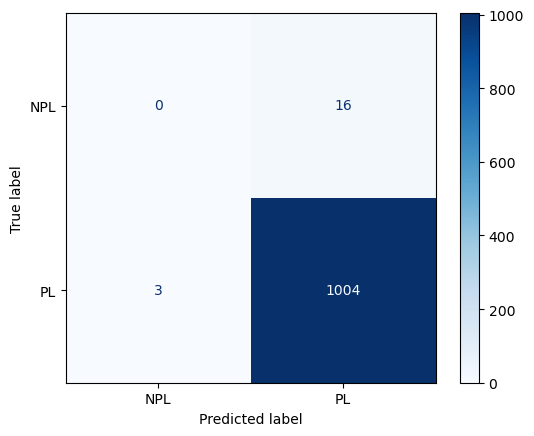

In [81]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


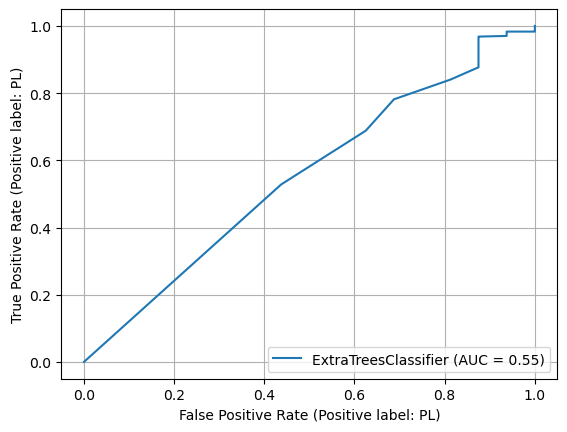

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classifier = model.fit(X_train,y_train)
classifier

LogisticRegression()

In [84]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 98.43597262952102
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is : 98.38709677419354
Cross Validation std is : 0.14662756598240456


In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report : \n',cr)

Confusion matrix : 
 [[   0   16]
 [   0 1007]]
Classification report : 
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        16
          PL       0.98      1.00      0.99      1007

    accuracy                           0.98      1023
   macro avg       0.49      0.50      0.50      1023
weighted avg       0.97      0.98      0.98      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


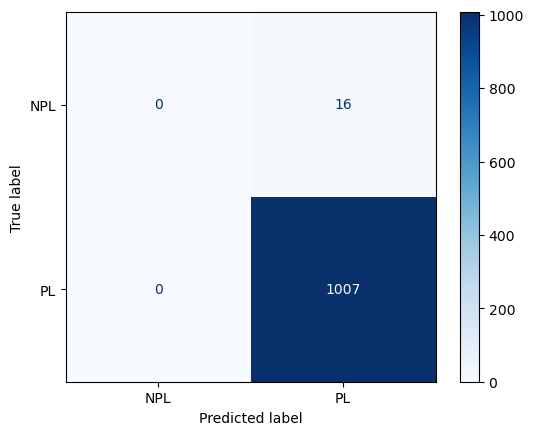

In [86]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


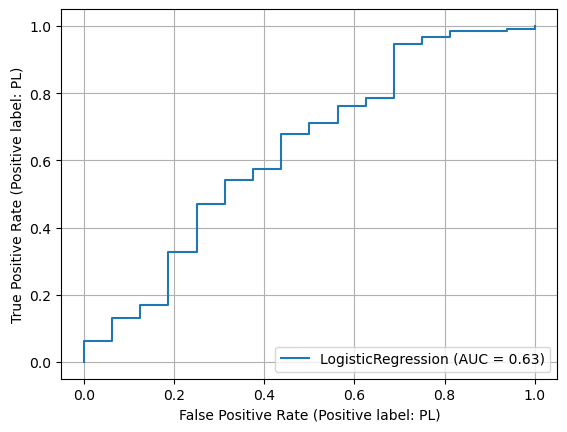

In [87]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## SVM

In [88]:
# from sklearn import svm
# model = svm.SVC(kernel='linear')
# classifier = model.fit(X_train,y_train)
# classifier

In [89]:
# #prediction
# y_pred = classifier.predict(X_test)
# from sklearn import metrics
# #Accuracy
# print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

# score = cross_val_score(model, X, y, cv=10)
# print(score)
# print("Cross Validation is ", np.mean(score)*100)

In [90]:
# from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
# plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

# MinMax Scaler

In [91]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print(scaler.fit_transform(X_train)[:5])
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

# Evaluation with StartfieldKFold

In [92]:
#pip install KFold

In [93]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_breast_cancer
# from sklearn.metrics import accuracy_score

# #
# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# kfold

In [94]:

#kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [95]:
#model = LogisticRegression()

In [96]:
# results = []
# for train_index, test_index in kfold.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     print(X_train)
#     y_train, y_test = y[train_index], y[test_index]
    

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
ldf = RandomForestClassifier(n_estimators=250, random_state=101)

classifier = ldf.fit(X_train,y_train)

## Predictions

In [99]:
predictions = classifier.predict(X_test)

In [100]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 98.43597262952102


In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, predictions)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   0   16]
 [   0 1007]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        16
          PL       0.98      1.00      0.99      1007

    accuracy                           0.98      1023
   macro avg       0.49      0.50      0.50      1023
weighted avg       0.97      0.98      0.98      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dct = DecisionTreeClassifier(criterion='entropy')
classifier = dct.fit(X_train,y_train)

## Predictions

In [104]:
predictions = classifier.predict(X_test)

In [105]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 95.99217986314761


## Prunning

In [106]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.1427174975562


In [107]:
# from sklearn import tree
# fig = plt.figure(figsize=(40,20))
# _ = tree.plot_tree(classifier, 
#                    feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],
#                    class_names=['NPL','PL'],
#                    filled=True,node_ids=True, fontsize=10)

IndexError: list index out of range

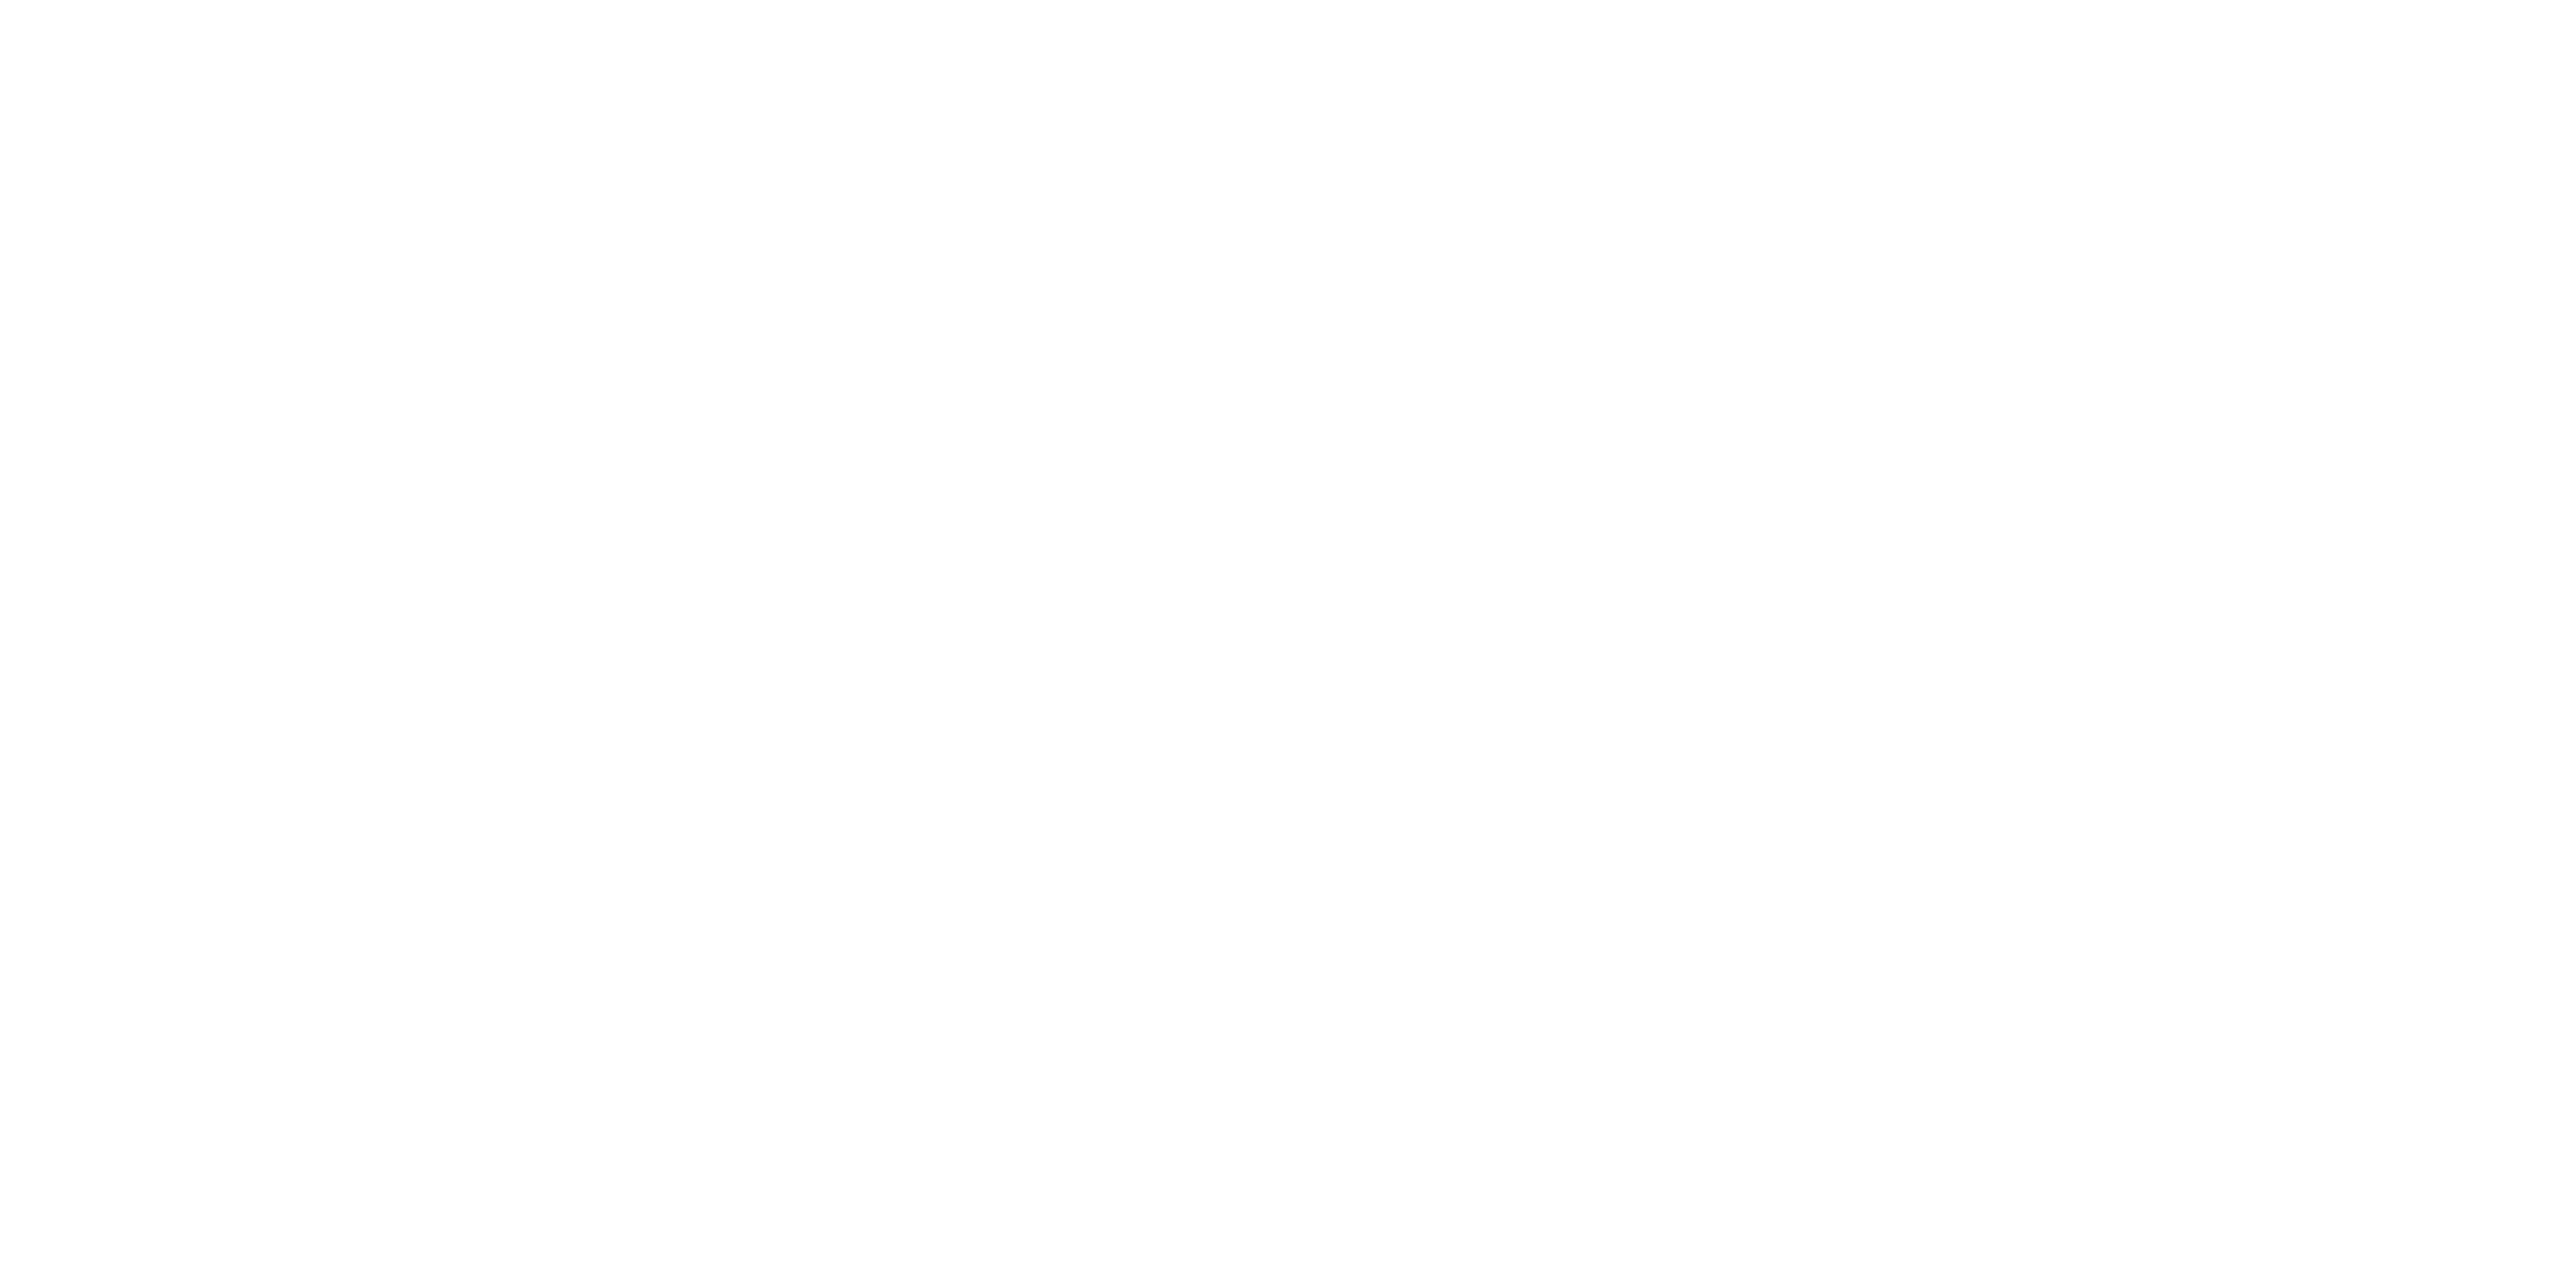

In [108]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [ ]:
#pip install graphviz

In [ ]:
import graphviz

In [ ]:
# dot_data = tree.export_graphviz(classifier, out_file=None,
#                                 feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],  
#                                 class_names=['NPL','PL'],
#                                 filled=True,node_ids=True, rounded=True,
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 11 does not match number of features, 12

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 27  17]
 [  0 340]]
Classification report  
               precision    recall  f1-score   support

         NPL       1.00      0.61      0.76        44
          PL       0.95      1.00      0.98       340

    accuracy                           0.96       384
   macro avg       0.98      0.81      0.87       384
weighted avg       0.96      0.96      0.95       384



In [ ]:
#pip install plot_confusion_matrix

In [ ]:
#pip install plot_roc_curve

In [ ]:
#pip install metrics

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


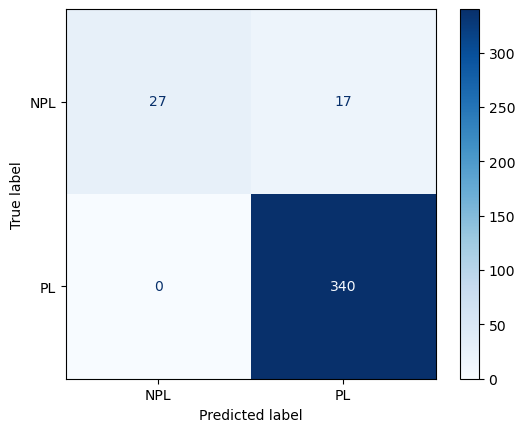

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


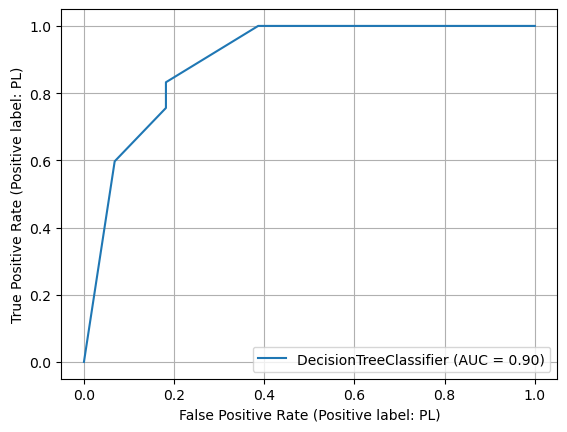

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()